In [105]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [106]:
# Time Domain Function
duration = 1  # seconds
sampling_rate = 5000  # Hz
frequencies = [5]  # Hz
t = torch.arange(0, duration, 1/sampling_rate)
L = len(t)
sine_wave_sum = torch.zeros_like(t)
for freq in frequencies:
    sine_wave_sum += torch.sin(2 * np.pi * freq * t)

Text(0, 0.5, 'Amplitude $A$')

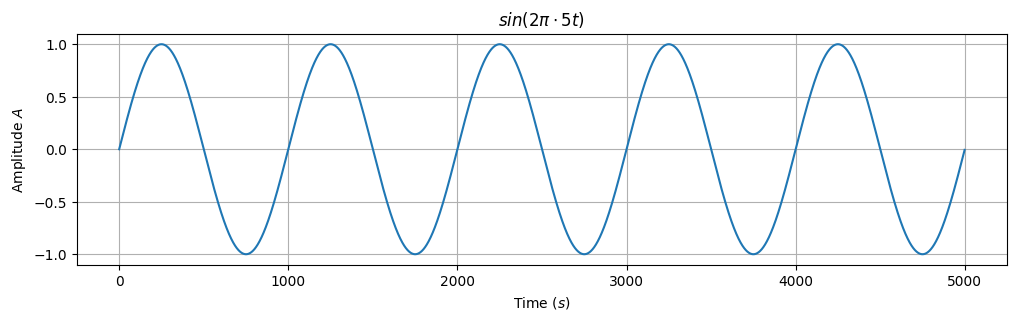

In [114]:
plt.figure(figsize=(12, 3))
plt.grid()
plt.plot(sine_wave_sum.numpy())
plt.title('+'.join([rf'$sin(2\pi\cdot{f}t)$' for f in frequencies]))
plt.xlabel(r'Time ($s$)'); plt.ylabel(r'Amplitude $A$')

In [116]:
# STFT
n_fft = 100
hop_length = 1 
win_length = n_fft
stft = torch.stft(
    input=sine_wave_sum,
    n_fft=n_fft,
    hop_length=hop_length, #default n_fft/4
    win_length=win_length, #default n_fft
    window=torch.hann_window(n_fft), # hann is a cosine window with ends that touch zero
    center=True, # pads input on both sides so that the t-th frame is centered at time t×hop_length
    pad_mode='reflect', # reflect means that the input is extended by reflecting about the edge of the last sample
    normalized=False, # not normalized
    onesided=True, # only return the positive frequencies
    return_complex=True # return complex numbers
)
# stft shape is: (Batch?, (n_fft//2)+1, 1+L//hop_length for center=True else 1+(L-n_fft)//hop_length)

In [117]:
#print all releevant shaapes with an ainformatinve message:
print("Shape is (B, N, T, C), where:")
print(f' - B --> None')
print(f' - N --> (n_fft//2)+1=({n_fft}//2)+1={(n_fft//2)+1}')
print(f" - T --> 1+L//hop_length=1+{L}//{hop_length}={1+L//hop_length}")
print(f" - C --> None")
print(f'STFT shape: {stft.shape}')


Shape is (B, N, T, C), where:
 - B --> None
 - N --> (n_fft//2)+1=(100//2)+1=51
 - T --> 1+L//hop_length=1+5000//1=5001
 - C --> None
STFT shape: torch.Size([51, 5001])


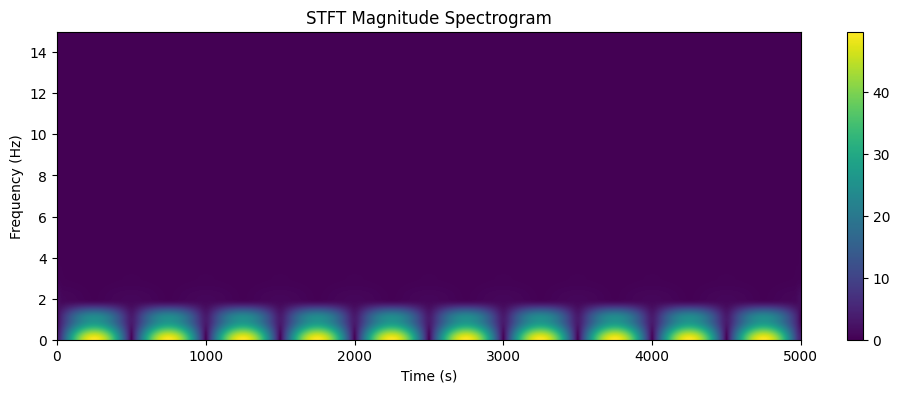

In [118]:
plt.figure(figsize=(12, 4))
plt.imshow(torch.abs(stft), aspect='auto')  # Invert the y-axis
plt.title('STFT Magnitude Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.ylim(0, 15)  # Trim the frequency range to 0-15 Hz
plt.colorbar()
plt.show()